In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"Downloads\Fraud.csv") 

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [87]:
#getting the statistical analysis 
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [88]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

# 1. Data cleaning including missing values, outliers

In [54]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [62]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [63]:
df.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64


# Deal with Imbalance Dataset

In [55]:
print(df.isFraud.value_counts("isFraud==1"))
#print(df.isFraud.value_counts)

0    0.998709
1    0.001291
Name: isFraud, dtype: float64


In [56]:
print(df.isFraud.value_counts())
#print(df.isFraud.value_counts)

0    6354407
1       8213
Name: isFraud, dtype: int64


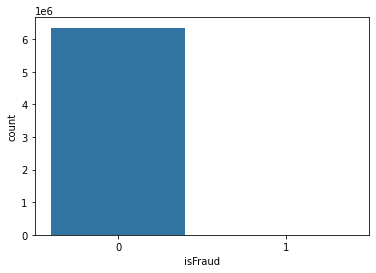

In [42]:
sns.countplot(df.isFraud)

# How did you select variables to be included in the model?

Using correlation in heat map we can easily visualize which feature is having strongly correlated eath other, Have a look in the graph you can see the correlation between oldbalanceOrg vs newbalanceOrg and oldbalanceOrg vs newbalanceOrg both having approx "1" which means it has a strong correlation between them, with using this kind of plot we can make a decision which should we kept and which feature should we remove.

<Figure size 2160x2880 with 0 Axes>

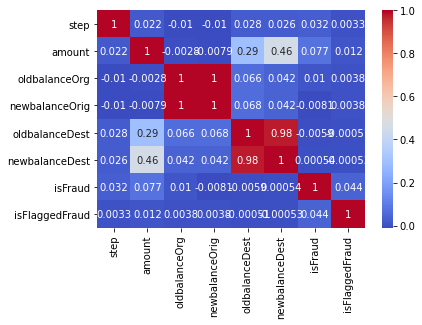

<Figure size 2160x2880 with 0 Axes>

In [13]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.figure(figsize=(30,40))

# Label encoding 

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df.type=label.fit_transform(df.type)
df.nameOrig=label.fit_transform(df.nameOrig)
df.nameDest=label.fit_transform(df.nameDest)

In [21]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


In [22]:
X = df.drop(columns=['isFraud'], axis=1)
y = df['isFraud']

# Describe your fraud detection model in elaboration.

2.Describe your fraud detection model in elaboration.
def:- Our Machine learning models are able to quickly identify patterns of fraud transactions. This means that the model can identify suspicious customers even when there hasn't been a chargeback yet.
there are various features on the basis of that final classification done, The "Fraud.csv" dataset has 63lakh approx rows that are huge dealing this kind of data takes huge time during training the model building and test the model, In this model, I used different classification model because of the dataset is imbalanced if we deal this kind of dataset it definitely gives amazing accruing but accuracy but this would give a biased result that why I approach sampling method used OverSampling from learning and then apply classification model and I found there before doing sampling LogisticRegression gives 56% accuracy, XGBClassifier gives approx 90% and RandomForestClassifier gives approx 87% accuracy and After doing sampling RandomForestClassifier gives 87% accuracy and XGBClassifier 65% accuracy 


# Model Training 

In [26]:
# train test split
#we use 70% of the data for training and rest of the for testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=42)

In [33]:
#using logistic regression because we deal with classificayion problem
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score
model = LogisticRegression()
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
print("F1 Score:",f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

F1 Score: 0.5641295759810376
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.79      0.44      0.56      2435

    accuracy                           1.00   1908786
   macro avg       0.89      0.72      0.78   1908786
weighted avg       1.00      1.00      1.00   1908786



In [38]:
#from xgboost import XGBClassifier
#import xgboost as xgb
pip install xgboost

# Demonstrate the performance of the model by using best set of tools. 

Using confusion matrix and accuracy score we can check the performance 

In [40]:
from xgboost import XGBClassifier
model = XGBClassifier(n_jobs=-1)
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:58:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.96      0.85      0.90      2435

    accuracy                           1.00   1908786
   macro avg       0.98      0.92      0.95   1908786
weighted avg       1.00      1.00      1.00   1908786

F1 Score: 0.900283656993236


In [41]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# training
model.fit(x_train, y_train)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.98      0.77      0.86      2435

    accuracy                           1.00   1908786
   macro avg       0.99      0.89      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786

F1 Score: 0.8626550298576022


In [47]:
from imblearn.over_sampling import RandomOverSampler

In [50]:
from collections import Counter

In [51]:
os=RandomOverSampler(0.5)
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)

C:\Users\laptop media\AppData\Roaming\Python\Python38\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [53]:
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 4448056, 1: 5778})
The number of classes after fit Counter({0: 4448056, 1: 2224028})


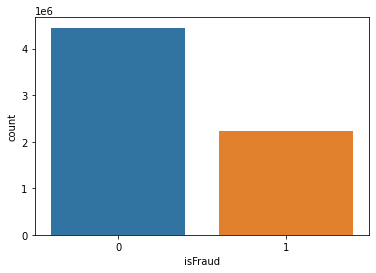

In [55]:
sns.countplot(y_train_ns)

In [56]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# training
model.fit(x_train_ns, y_train_ns)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

C:\Users\laptop media\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       1.00      0.97      0.98   1906351
           1       0.03      0.89      0.06      2435

    accuracy                           0.97   1908786
   macro avg       0.52      0.93      0.52   1908786
weighted avg       1.00      0.97      0.98   1908786

F1 Score: 0.06455281389815798


In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
model = RandomForestClassifier(n_jobs=-1)
# training
model.fit(x_train_ns, y_train_ns)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.96      0.80      0.87      2435

    accuracy                           1.00   1908786
   macro avg       0.98      0.90      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786

F1 Score: 0.8726541554959786


In [60]:
from xgboost import XGBClassifier
model = XGBClassifier(n_jobs=-1)
# training
model.fit(x_train_ns, y_train_ns)
# testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:54:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.50      0.98      0.66      2435

    accuracy                           1.00   1908786
   macro avg       0.75      0.99      0.83   1908786
weighted avg       1.00      1.00      1.00   1908786

F1 Score: 0.6591822591822593


# What are the key factors that predict fraudulent customer?
there are many feature but "isFraud" is gives the info about the customer is fraud or legit

# Describe your fraud detection model in elaboration.
def:- Our Machine learning models are able to quickly identify patterns of fraud transactions. This means that the model can identify suspicious customers even when there hasn't been a chargeback yet.
there are various features on the basis of that final classification done, The "Fraud.csv" dataset has 63lakh approx rows that are huge dealing this kind of data takes huge time during training the model building and test the model, In this model, I used different classification model because of the dataset is imbalanced if we deal this kind of dataset it definitely gives amazing accruing but accuracy but this would give a biased result that why I approach sampling method used OverSampling from learning and then apply classification model and I found there before doing sampling LogisticRegression gives 56% accuracy, XGBClassifier gives approx 90% and RandomForestClassifier gives approx 87% accuracy and After doing sampling RandomForestClassifier gives 87% accuracy and XGBClassifier 65% accuracy 

# Do these factors make sense? If yes, How? If not, How not?
Yes it makes sense because by using "isFradu" we can check if customer is fraud or legit it helps alot in isFlaggedFraud and "type" is gives info about the payments type all feature give descent information about the customer 

# How did you select variables to be included in the model?
Using correlation in heat map we can easily visualize which feature is having strongly correlated eath other, Have a look in the graph you can see the correlation between oldbalanceOrg vs newbalanceOrg and oldbalanceOrg vs newbalanceOrg both having approx "1" which means it has a strong correlation between them, with using this kind of plot we can make a decision which should we kept and which feature should we remove.

# What kind of prevention should be adopted while company update its infrastructure?
Set limit to amount transaction, if it extends the limit the person should contact company to verify.

# Assuming these actions have been implemented, how would you determine if they work?
if these actions are implemented,I feel it will work better than current situation.